#  NLP Unsupervised Clustering Project (Disney Characters)

**Summary:** <br>

This project performs Natural Language Processing (NLP) on Disney character data obtained through an API. It involves scraping Disney character information, processing the text data, and applying unsupervised machine learning techniques to uncover underlying clusters or groups of characters. The project uses clustering algorithms and visualizations to better understand the patterns and relationships between the characters. <br> 

**API Dataset Details:** <br>

The dataset used in this project is scraped from the Disney API, which provides data on various Disney characters. Each character is associated with several attributes, including their name, unique ID, and the list of films in which they appear. <br>

**API Dataset Link:** <br>
https://disneyapi.dev/docs/

**Fetching API Dataset:** <br>
https://api.disneyapi.dev/character?page={page_number}


**Project Overview:** <br>

The goal of this project is to explore Disney character data from the API and apply an unsupervised learning method, such as K-Means clustering, to identify clusters or groups of Disney characters. The key steps involved include: <br>

- Data Acquisition: Scrape character data from the Disney API. <br>
- Data Preprocessing: Clean and prepare the text data (i.e., film titles) for analysis. <br>
- Feature Extraction: Vectorize the cleaned text using the TfidfVectorizer. <br>
- Clustering: Apply K-Means clustering to group similar characters together. <br>
- Dimensionality Reduction: Use PCA (Principal Component Analysis) for visualizing the clusters in 2D and 3D. <br>
- Analysis: Analyze the resulting clusters and identify the characteristics of each group. <br>

**Output and Results:**

- Clusters: The characters will be grouped into clusters based on their appearances in films. <br>
- Visualizations: The clusters will be visualized in 2D and 3D using PCA. <br>
- Top Words: For each cluster, the top 10 most frequent words associated with the films will be displayed to help identify the themes or characteristics of the cluster. <br>

In [1]:
import requests
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
# Acquire data from Disney API

base_url = "https://api.disneyapi.dev/character"

def fetch_characters(page=1):
    response = requests.get(f"{base_url}?page={page}")
    return response.json()

# Initialize an empty list to store all characters
all_characters = []

# Get data from all pages (getting from 149 pages)
for page in range(1, 150):  
    print(f"Fetching page {page}...")
    data = fetch_characters(page)
    all_characters.extend(data['data'])

# Convert to DataFrame
characters_df = pd.DataFrame(all_characters)

# Show the first few rows
characters_df.head()

Fetching page 1...
Fetching page 2...
Fetching page 3...
Fetching page 4...
Fetching page 5...
Fetching page 6...
Fetching page 7...
Fetching page 8...
Fetching page 9...
Fetching page 10...
Fetching page 11...
Fetching page 12...
Fetching page 13...
Fetching page 14...
Fetching page 15...
Fetching page 16...
Fetching page 17...
Fetching page 18...
Fetching page 19...
Fetching page 20...
Fetching page 21...
Fetching page 22...
Fetching page 23...
Fetching page 24...
Fetching page 25...
Fetching page 26...
Fetching page 27...
Fetching page 28...
Fetching page 29...
Fetching page 30...
Fetching page 31...
Fetching page 32...
Fetching page 33...
Fetching page 34...
Fetching page 35...
Fetching page 36...
Fetching page 37...
Fetching page 38...
Fetching page 39...
Fetching page 40...
Fetching page 41...
Fetching page 42...
Fetching page 43...
Fetching page 44...
Fetching page 45...
Fetching page 46...
Fetching page 47...
Fetching page 48...
Fetching page 49...
Fetching page 50...
Fetching 

,_id,films,shortFilms,tvShows,videoGames,parkAttractions,allies,enemies,sourceUrl,name,imageUrl,createdAt,updatedAt,url,__v,alignment
0,112,[Hercules (film)],[],[Hercules (TV series)],[Kingdom Hearts III],[],[],[],https://disney.fandom.com/wiki/Achilles_(Hercu...,Achilles,https://static.wikia.nocookie.net/disney/image...,2021-04-12T01:31:30.547Z,2021-12-20T20:39:18.033Z,https://api.disneyapi.dev/characters/112,0,NaN
1,18,"[The Fox and the Hound, The Fox and the Hound 2]",[],[],[],[],[],[],https://disney.fandom.com/wiki/Abigail_the_Cow,Abigail the Cow,https://static.wikia.nocookie.net/disney/image...,2021-04-12T01:26:03.413Z,2021-12-20T20:39:18.032Z,https://api.disneyapi.dev/characters/18,0,NaN
2,16,[Cheetah],[],[],[],[],[],[],https://disney.fandom.com/wiki/Abdullah,Abdullah,https://static.wikia.nocookie.net/disney/image...,2021-04-12T01:26:02.377Z,2021-12-20T20:39:18.032Z,https://api.disneyapi.dev/characters/16,0,NaN
3,45,"[Mary Poppins (film), Mary Poppins Returns]",[],[],[],[],[],[],https://disney.fandom.com/wiki/Admiral_Boom_an...,Admiral Boom and Mr. Binnacle,https://static.wikia.nocookie.net/disney/image...,2021-04-12T01:26:21.560Z,2021-12-20T20:39:18.033Z,https://api.disneyapi.dev/characters/45,0,NaN
4,7,[],[],[Gravity Falls],[],[],[],[],https://disney.fandom.com/wiki/.GIFfany,.GIFfany,https://static.wikia.nocookie.net/disney/image...,2021-04-12T01:25:10.354Z,2021-12-20T20:39:18.032Z,https://api.disneyapi.dev/characters/7,0,NaN


In [3]:
# Only want the 'name', '_id' and 'films' columns.

# Filter out rows where the 'films' column is missing or empty
filtered_characters_df = characters_df[characters_df['films'].notna() & characters_df['films'].apply(len) > 0]

# Select only the columns _id, films, and name
filtered_characters_df = filtered_characters_df[['name', '_id', 'films']]

# Display the resulting DataFrame
#filtered_df.head()

filtered_characters_df

,name,_id,films
0,Achilles,112,[Hercules (film)]
2,Abdullah,16,[Cheetah]
11,Amos,215,[Ben and Me]
17,Ashcan and Pete,337,[Homeward Bound II: Lost in San Francisco]
18,Aspen,342,[Bedtime Stories]
...,...,...,...
7422,Jenny Wren,7382,[Who Framed Roger Rabbit]
7425,"Yao, Ling, and Chien Po",7420,"[Mulan, Mulan II, Mulan (2020 film)]"
7426,Stanley Yelnats III,7429,[Holes]
7427,Yin,7436,[Leroy & Stitch]


In [4]:
# Need to clean data for 'films' column (removing [], () and :)

# Function to clean text data
def clean_text(text):
    # Remove square brackets, parentheses, colons, and other unwanted characters
    text = re.sub(r'[\[\]\(\):,]', '', text)   # Removes brackets, parentheses, and colons
    text = re.sub(r'\s+', ' ', text)           # Replace multiple spaces with a single space
    text = text.lower()                        # Convert to lowercase
    return text

In [5]:
# Further cleaning of 'films' column

# Clean the 'films' column (convert lists to strings and clean the text)
filtered_characters_df['films_text'] = filtered_characters_df['films'].apply(lambda x: ' '.join(x))
filtered_characters_df['cleaned_films_text'] = filtered_characters_df['films_text'].apply(clean_text)

# Show the cleaned text for verification
print("Cleaned films text:")
print(filtered_characters_df[['name', 'cleaned_films_text']].head())

filtered_characters_df

Cleaned films text:
               name                       cleaned_films_text
0          Achilles                            hercules film
2          Abdullah                                  cheetah
11             Amos                               ben and me
17  Ashcan and Pete  homeward bound ii lost in san francisco
18            Aspen                          bedtime stories


,name,_id,films,films_text,cleaned_films_text
0,Achilles,112,[Hercules (film)],Hercules (film),hercules film
2,Abdullah,16,[Cheetah],Cheetah,cheetah
11,Amos,215,[Ben and Me],Ben and Me,ben and me
17,Ashcan and Pete,337,[Homeward Bound II: Lost in San Francisco],Homeward Bound II: Lost in San Francisco,homeward bound ii lost in san francisco
18,Aspen,342,[Bedtime Stories],Bedtime Stories,bedtime stories
...,...,...,...,...,...
7422,Jenny Wren,7382,[Who Framed Roger Rabbit],Who Framed Roger Rabbit,who framed roger rabbit
7425,"Yao, Ling, and Chien Po",7420,"[Mulan, Mulan II, Mulan (2020 film)]",Mulan Mulan II Mulan (2020 film),mulan mulan ii mulan 2020 film
7426,Stanley Yelnats III,7429,[Holes],Holes,holes
7427,Yin,7436,[Leroy & Stitch],Leroy & Stitch,leroy & stitch


In [6]:
# Update dataframe, removing the 'films' and 'films_text' columns

# Remove the 'films' and 'films_text' columns
filtered_characters_df = filtered_characters_df.drop(columns=['films', 'films_text'])

# Display the updated DataFrame
#print(filtered_characters_df.head())
filtered_characters_df

,name,_id,cleaned_films_text
0,Achilles,112,hercules film
2,Abdullah,16,cheetah
11,Amos,215,ben and me
17,Ashcan and Pete,337,homeward bound ii lost in san francisco
18,Aspen,342,bedtime stories
...,...,...,...
7422,Jenny Wren,7382,who framed roger rabbit
7425,"Yao, Ling, and Chien Po",7420,mulan mulan ii mulan 2020 film
7426,Stanley Yelnats III,7429,holes
7427,Yin,7436,leroy & stitch


**Note:**

The 'cleaned_films_text' column will be fitted and transformed with the TfidfVectorizer (into a sparse matrix of numerical features).

In [7]:
# Apply TfidfVectorizer to X, to 'cleaned_films_text' column

# Vectorize the cleaned text using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(filtered_characters_df['cleaned_films_text'])

print(X.shape)

(2651, 703)


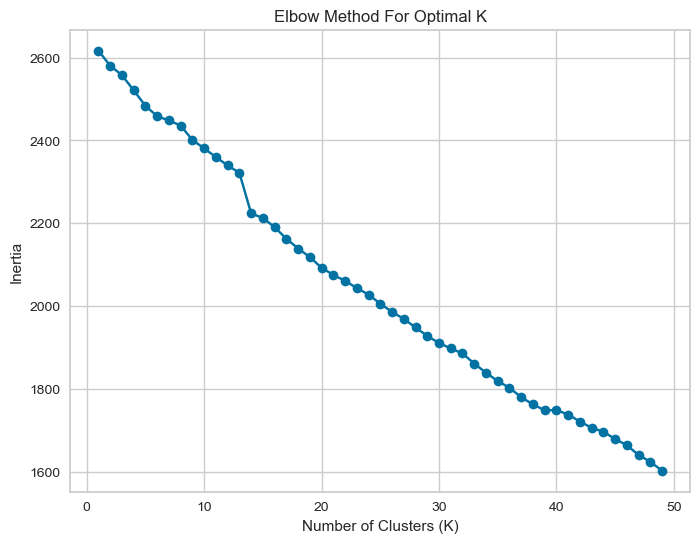

In [8]:
# Elbow Plot

from yellowbrick.cluster import KElbowVisualizer

# Elbow Method - Calculate Inertia for different values of K
inertia = []
K_range = range(1, 50)  # Trying K from 1 to 50 clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Noticed an "elbow at K = 39", will take K = 39.

**Note:**

With an elbow displayed at K = 39, we chose K = 39 or 39 clusters.

In [9]:
# Using K-Means Clustering and set number of clusters

# Chosen K = 39

# Apply KMeans clustering to the vectorized text
n_clusters = 39  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

filtered_characters_df['cluster'] = kmeans.labels_

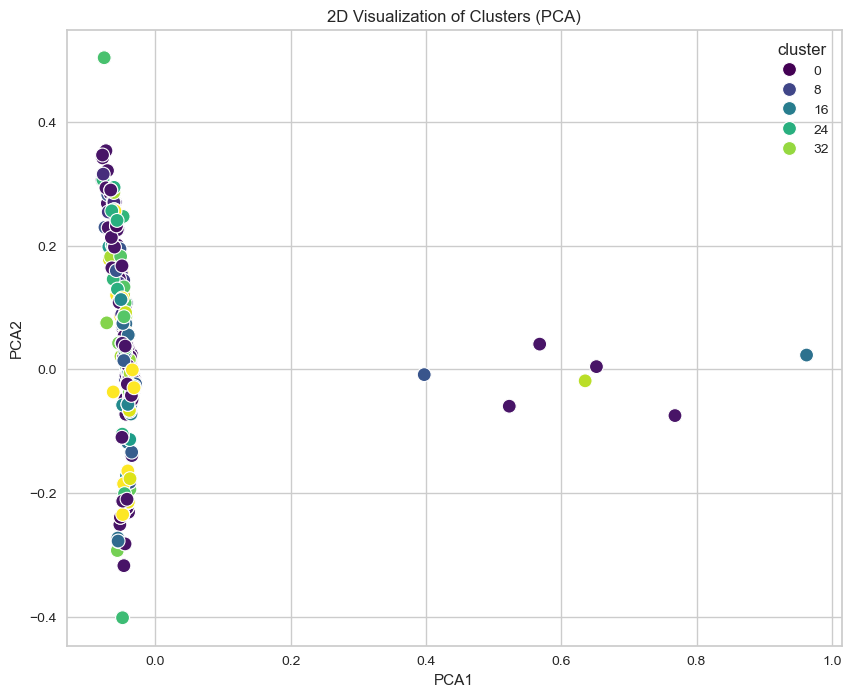

In [10]:
# PCA and plotting clusters

# Reduce dimensionality to 2D 
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())

# Create a DataFrame with the reduced data and cluster labels
pca_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = filtered_characters_df['cluster']

# Plot clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df, palette='viridis', s=100)
plt.title("2D Visualization of Clusters (PCA)")
plt.show()

**Comments for K-Means Clustering (PCA) 2D Plot:**

- Noticed the majority of data is found at PCA1 at -0.1 (in the x-axis), in a form of a column with multiple values of PCA2 ranging from -0.4 to 0.5 (in the y-axis).
- Noticed there are about 7 data points at PCA1 of about 0.39 and above (in the x-axis). The same 7 points are in the range for PCA2 between -0.1 to 0.1 (in the y-axis).

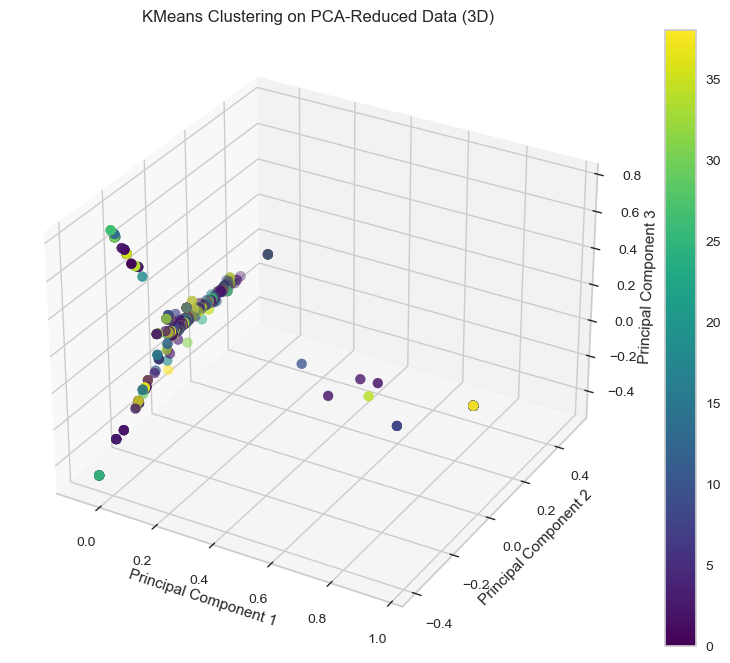

In [11]:
# 3D KMeans Clustering Plot

from mpl_toolkits.mplot3d import Axes3D

# Reduce dimensionality to 3D
pca_3d = PCA(n_components=3)
reduced_data_3d = pca_3d.fit_transform(X.toarray())

# Create a DataFrame with the 3D reduced data and cluster labels
pca_3d_df = pd.DataFrame(reduced_data_3d, columns=['PCA1', 'PCA2', 'PCA3'])
pca_3d_df['cluster'] = filtered_characters_df['cluster']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters
scatter = ax.scatter(pca_3d_df['PCA1'], pca_3d_df['PCA2'], pca_3d_df['PCA3'],
                     c=pca_3d_df['cluster'], cmap='viridis', s=50)


ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.colorbar(scatter)
plt.title("KMeans Clustering on PCA-Reduced Data (3D)")

plt.show()

**Comments for K-Means Clustering (PCA) 3D Plot:**

- Noticed the majority of data is found at PCA1 at -0.1 (in the x-axis), in a form of a column with multiple values of PCA2 ranging from -0.4 to 0.5 (in the y-axis).
- Noticed there are about 7 data points at PCA1 of about 0.39 and above (in the x-axis). The same 7 points are in the range for PCA2 between -0.1 to 0.1 (in the y-axis).
- Noticed the majority of data is found at PCA3 in the range of -0.3 to 0 (in the z-axis).
- Noticed a small group of data at PCA3 of about 0.2 and above (in the z-axis). The same data points are on PCA1 of around -0.1 (in the x-axis), ranging in PCA2 from -0.2 to 0 (in the y-axis).

In [12]:
# See which Disney character is in which cluster

# Show the characters in each cluster
for i in range(n_clusters):
    print(f"\nCharacters in Cluster {i}:")
    cluster_characters = filtered_characters_df[filtered_characters_df['cluster'] == i]
    print(cluster_characters[['name', 'cleaned_films_text']].head())


Characters in Cluster 0:
                 name                                 cleaned_films_text
174      George Banks  mary poppins film saving mr. banks mary poppin...
191      Uncle Albert                                  mary poppins film
198             Angus                               mary poppins returns
454  The Balloon Lady                               mary poppins returns
456    Winifred Banks  mary poppins film mary poppins returns saving ...

Characters in Cluster 1:
                      name      cleaned_films_text
821       Captain Moreland   swiss family robinson
895     Sunset Boulevardez  the proud family movie
926  LaCienega Boulevardez  the proud family movie
950      Felix Boulevardez  the proud family movie
979       Papi Boulevardez  the proud family movie

Characters in Cluster 2:
              name        cleaned_films_text
2         Abdullah                   cheetah
11            Amos                ben and me
18           Aspen           bedtime storie

**Some Observations from the Clusters:**

<u>Looking at 3 Clusters:</u>

1. Cluster 9: <br>
- We noticed these characters within this cluster are from a "hercules" movie title and/or a "hercules film" movie title. <br>
- We can strongly assume that these characters have a relation with any film(s) related to "hercules". <br>
   
2. Cluster 18: <br>
- We noticed characters within this cluster are all from a "zootopia" movie title. <br>
- We can strongly assume that these characters have a relation with any film(s) related to "zootopia". <br>
   
3. Cluster 34: <br>
- We noticed 3 characters are from the movie "the lion guard return of the roar". <br>
- One character is from the movie "return to oz". <br> 
- One character is from the movie "return to halloweentown". <br>
- We see that 3 characters are from the same movie, but the remaining two characters are from two seperate movies. <br>
- However, we notice that each of these movie titles (for all characters in cluster 34) have the word "return" in their movie title. <br>


In [13]:
# See the top 10 words in each cluster

# Get feature names for each cluster centroid
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

# Display the top 10 words for each cluster
for i in range(n_clusters):
    print(f"Cluster {i}:")
    print("Top words:", [terms[ind] for ind in order_centroids[i, :10]])
    print("\n")

Cluster 0:
Top words: ['mary', 'poppins', 'returns', 'film', 'banks', 'saving', 'mr', 'frog', 'game', 'gadget']


Cluster 1:
Top words: ['family', 'proud', 'robinson', 'movie', 'swiss', 'hills', 'beverly', 'zorro', 'game', 'gadget']


Cluster 2:
Top words: ['jungle', 'frankenweenie', 'meet', 'robinsons', 'holes', 'woods', 'wild', 'pollyanna', 'force', 'book']


Cluster 3:
Top words: ['mickey', 'house', 'mouse', 'villains', 'christmas', 'snowed', 'magical', 'detective', 'great', 'film']


Cluster 4:
Top words: ['fantasia', '2000', 'halloween', 'bald', 'night', 'mountain', 'rescuers', 'house', 'mickey', 'film']


Cluster 5:
Top words: ['stitch', 'leroy', 'lilo', 'movie', 'glitch', 'internet', 'breaks', 'ralph', 'action', 'live']


Cluster 6:
Top words: ['dalmatians', '102', '101', '1996', 'patch', 'london', 'adventure', 'film', 'ii', 'house']


Cluster 7:
Top words: ['santa', 'clause', 'paws', 'search', 'buddies', 'escape', 'pups', 'zorro', 'friday', 'game']


Cluster 8:
Top words: ['car

**Some Observations from the top 10 words from each Cluster:**

Looking at the same 3 Clusters:

1. Cluster 9: <br>
- Top words: ['hercules', 'film', 'zero', 'hero', 'villains', 'house', 'mickey', 'franchise', 'frog', 'games']
- The characters in this cluster are from a "hercules" movie title and/or a "hercules film" movie title.
- We can see that 'hercules' and 'film' are among the top ten words for this cluster.
- This could explain the relation of these characters (in cluster 9) and their same and/or similar movie title based on the words from the movie titles.

2. Cluster 18: <br>
- Top words: ['zootopia', 'little', 'geek', 'gang', 'games', 'game', 'gadget', 'fun', 'fully', 'frozen']
- The characters in this cluster are all from a "zootopia" movie title.
- We can see that 'zootopia' is among the top ten words for this cluster.
- This could explain the relation of these characters (in cluster 18) and their same movie title based on the words from the movie title.

3. Cluster 34: <br>
- Top words: ['return', 'lion', 'guard', 'oz', 'roar', 'king', 'milo', 'atlantis', 'land', '1½']
- Three character are from the same movie, while the last two are from two completely different movies.
- We noticed from before that all characters (in cluster 34) all come from movies with the word "return" in their movie title.
- We can see that 'return' is among the top ten words for this cluster.
- This could explain the relation of these characters (in cluster 34) were most likely put in the same cluster, strongly due to the word 'return' in their movie title.

**Conclusion:**

- The "cleaned" movies titles column ('cleaned_films_text') was fitted and transformed with the TfidfVectorizer.
- A K-Means Clustering model was used to determine the clusters.
- Based off the Elbow Method plot, K = 39 or 39 clusters was chosen.
- A K-Means Clustering (PCA) 2D plot & 3D plot were displayed.
- Cluster analysis showed that the majority of characters were placed in each cluster strongly based on the words from their movie titles.

## End